In [1]:
from scipy.spatial.distance import directed_hausdorff
import gudhi as gd

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
# This function plots all barcodes together
# Gets the (b, d) coordinates and makes the (m, h) coordinate changes
# and plots the corresponding functions
def landscape(bd_coords):
    mh_coords = [((x[0]+x[1])/2, (x[1]-x[0])/2) for x in bd_coords if x[1] != float('inf')]
    mh_coords_mat = np.matrix(mh_coords)
    bd_coords_wo_inf = [x for x in bd_coords if x[1] != float('inf')]
    fig = plt.figure()
    plt.title('Persistence Landscape')
    for i in range(len(mh_coords)):
        mh = mh_coords[i]
        bd = bd_coords_wo_inf[i]
        plt.plot([bd[0], mh[0]], [0, mh[1]], 'b-')
        plt.plot([mh[0], bd[1]], [mh[1], 0], 'b-')

    plt.plot(mh_coords_mat[:,0], mh_coords_mat[:,1], 'o')
    plt.show()

#Lambda function
def Lambda(t,b,d):
    return max([0, min([t-b, d-t])])
#Landscape function
def lambda_k(t,k,bd):
    l = [Lambda(t,bd[i][0], bd[i][1]) for i in range(len(bd))]
    return sorted(l, reverse=True)[k]
#Computes and plots the k-th landscape  
def plot_lambda_k(k, bd, axis=None):
    t_min = 0
    t_max = max([max(x[0],x[1]) for x in bd])
    h_min = 0
    mh_coords = [((x[0]+x[1])/2, (x[1]-x[0])/2) for x in bd_coords if x[1] != float('inf')]
    h_max = max([x[1] for x in mh_coords])
    
    if axis == None:
        fig = plt.figure()
        axis = fig.gca()
        
    tt = np.linspace(t_min, t_max, int((t_max-t_min)/0.01))
    y = [lambda_k(t,k,bd) for t in tt]
    axis.plot(tt, y, 'b-')
    axis.set_title(r'$\lambda_{%d}$' % k)
    axis.set_xlim([t_min, t_max])
    axis.set_ylim([h_min, h_max])

    if axis == None:
        plt.show()
    
    return axis

# Computing the Vietoris-Rips filtration of a regular hexagon of radius 1.



Deprecated parameter. It has been replaced by max_intervals
Deprecated parameter. It has been replaced by max_intervals


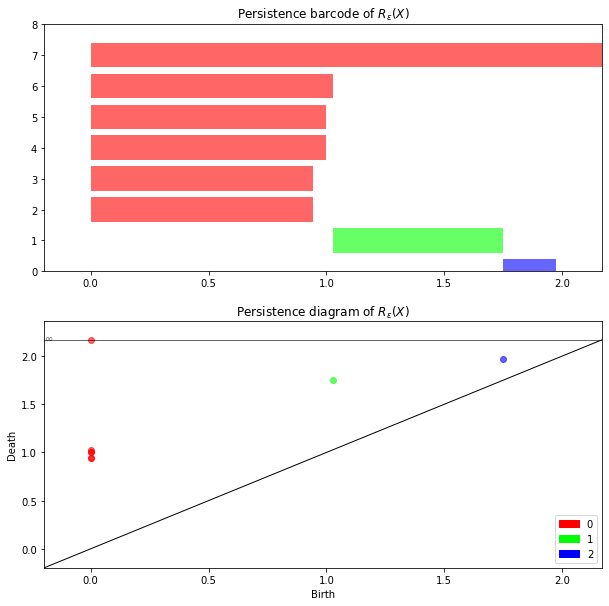

In [3]:
X =[(0, 0), (1, 0), (1.5, 0.9), (1, 1.7), (0, 1.7), (-0.5, 0.9)]

RX = gd.RipsComplex(points=X)
st_X = RX.create_simplex_tree(max_dimension=len(X))
diag_X = st_X.persistence(min_persistence=0.01)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
gd.plot_persistence_barcode(diag_X, legend=False)
plt.title(r'Persistence barcode of $R_\varepsilon(X)$')
plt.subplot(2,1,2)
gd.plot_persistence_diagram(diag_X, legend=True)
plt.title(r'Persistence diagram of $R_\varepsilon(X)$')
plt.show()

Let us plot all the landscapes together, using our code.

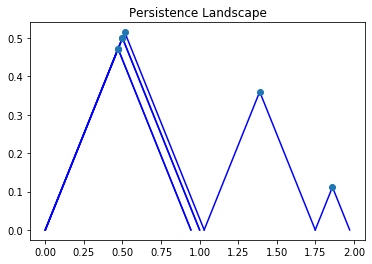

In [4]:
bd_coords = [x[1] for x in diag_X]
fig = landscape(bd_coords)

And now let us plot all the individual landscapes functions. In this case, we omit the infinite ray, as it is a common thing to do.

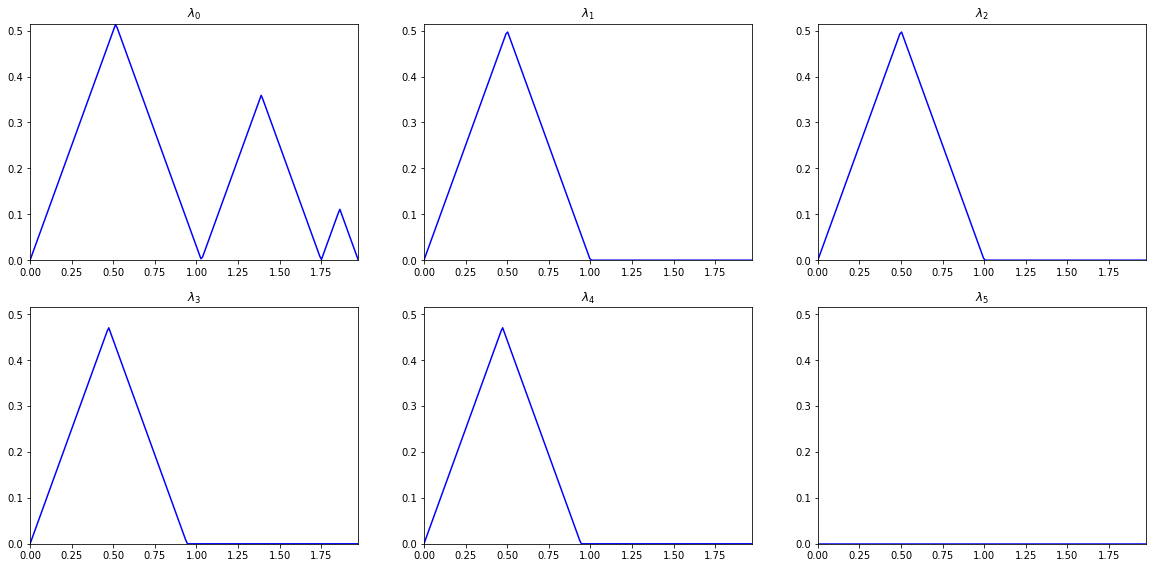

In [5]:
bd_coords = [x[1] for x in diag_X if x[1][1] != float('inf')]
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
for i in range(6):
    ax = plt.subplot(4,3,i+1)
    plot_lambda_k(i, bd_coords, ax)
plt.show()

# Performing TDA on a Point Cloud in $\mathbb{R}^2$. 

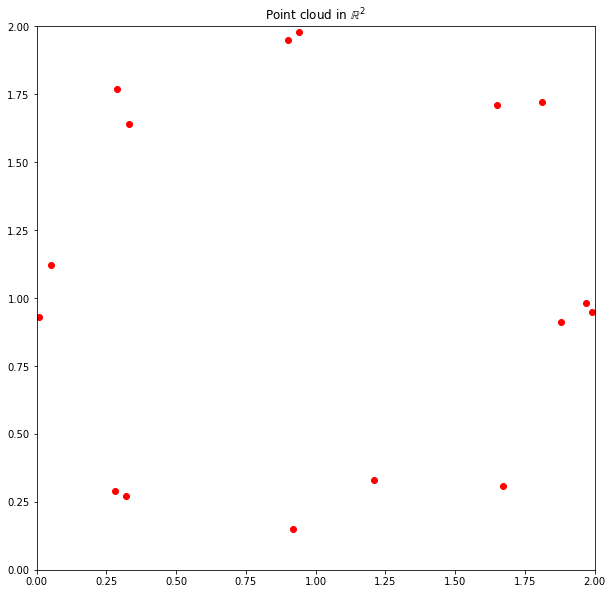

In [6]:
X = np.array([[0.01, 0.93], [0.05, 1.12], [0.28, 0.29], [0.29, 1.77], [0.32, 0.27], [0.33, 1.64], [0.90, 1.95], 
     [0.92, 0.15], [0.94, 1.98], [1.21, 0.33], [1.65, 1.71], [1.67, 0.31],
     [1.81, 1.72], [1.88, 0.91], [1.97, 0.98], [1.99, 0.95]])

plt.figure(figsize=(10,10))
plt.plot(X[:,0], X[:,1], 'ro')
plt.xlim([0,2])
plt.ylim([0,2])
plt.title(r'Point cloud in $\mathbb{R}^2$')
plt.show()

Notice the parameter *max dimension* in the *create simplex tree* function. This parameter allows us to bound the dimension of the simplexs that will be included in the filtration. In this case, we have only $16$ points and the point cloud looks like a circle, so most probably we won't find many strange relations. However, when we have real cases of data, the algorithm can find strange complexs spanned by strange relations that we do not want to study. In most cases, we will be only interested in studying $H_0$, $H_1$ or $H_2$, so we can tell the program not to compute any further.

Deprecated parameter. It has been replaced by max_intervals
Deprecated parameter. It has been replaced by max_intervals


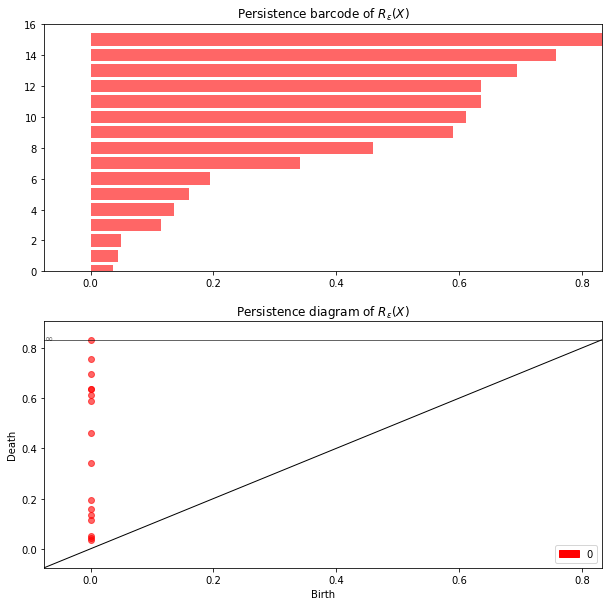

Deprecated parameter. It has been replaced by max_intervals
Deprecated parameter. It has been replaced by max_intervals


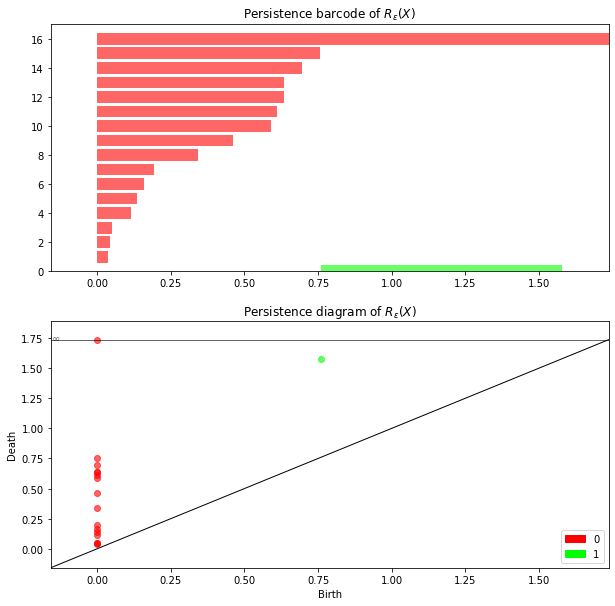

In [7]:
#Max dimension = 1, we only compute the 0-skeleton and hence only compute H_0 homology
RX = gd.RipsComplex(points=X)
st_X = RX.create_simplex_tree(max_dimension=1)
diag_X = st_X.persistence(min_persistence=0.01)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
gd.plot_persistence_barcode(diag_X, legend=False)
plt.title(r'Persistence barcode of $R_\varepsilon(X)$')
plt.subplot(2,1,2)
gd.plot_persistence_diagram(diag_X, legend=True)
plt.title(r'Persistence diagram of $R_\varepsilon(X)$')
plt.show()

#Max dimension = 2, so we compute the 1-skeleton and hence compute H_0 and H_1 homology 
RX = gd.RipsComplex(points=X)
st_X = RX.create_simplex_tree(max_dimension=2)
diag_X = st_X.persistence(min_persistence=0.01)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
gd.plot_persistence_barcode(diag_X, legend=False)
plt.title(r'Persistence barcode of $R_\varepsilon(X)$')
plt.subplot(2,1,2)
gd.plot_persistence_diagram(diag_X, legend=True)
plt.title(r'Persistence diagram of $R_\varepsilon(X)$')
plt.show()

Recall that the Vietoris-Rips complex is a flag complex, so it is strange to have any homology besides $H_0$. However, we have a generator for $H_1$ that survives for quite a lot. This is very relevant and supports our hypothesis that the data is circle-shaped.

Now, let us see the landscapes.

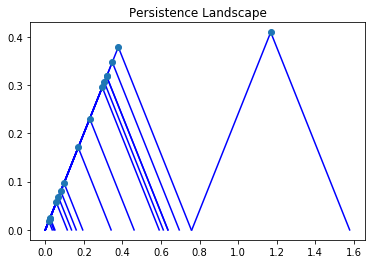

In [8]:
bd_coords = [x[1] for x in diag_X]
fig = landscape(bd_coords)

And all landscapes functions individually. 

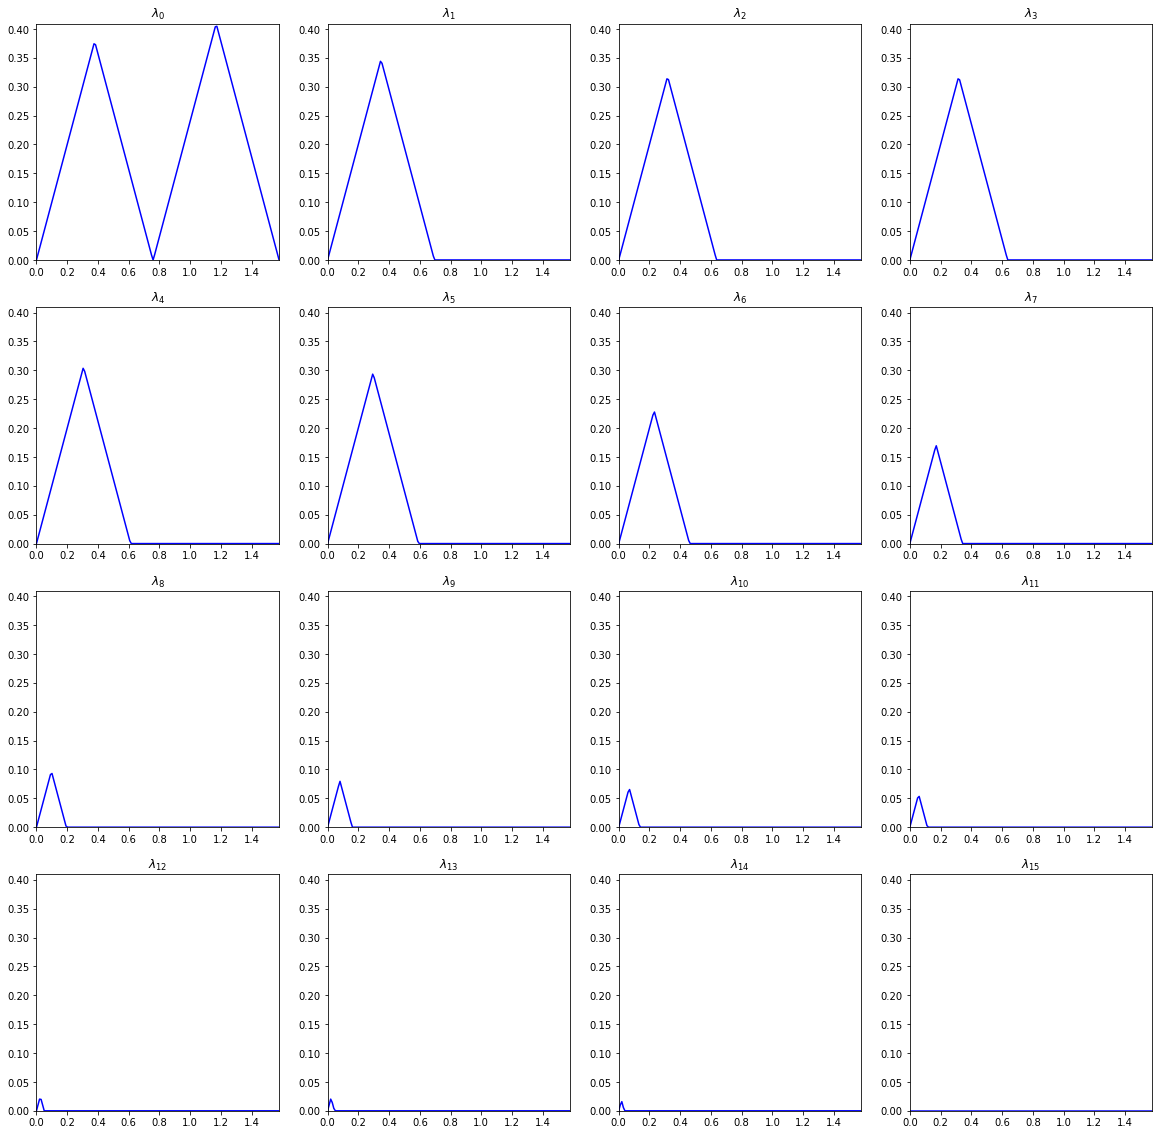

In [9]:
bd_coords = [x[1] for x in diag_X if x[1][1] != float('inf')]
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plot_lambda_k(i, bd_coords, ax)
plt.show()

# Performing TDA on a Point Cloud in $\mathbb{R}^3$.

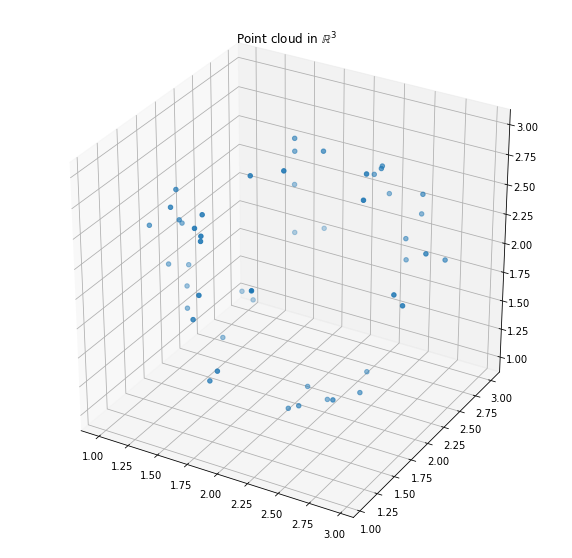

In [10]:
X = np.array([[1.05, 2.00, 2.16], [2.96, 1.84, 2.09], [2.49, 2.77, 1.87], [1.99, 2.42, 2.82],
[1.59, 1.42, 2.66], [2.27, 1.59, 1.16], [1.69, 1.24, 2.60], [2.22, 2.76, 2.53],
[2.50, 2.74, 2.07], [2.55, 1.59, 1.30], [1.80, 1.15, 1.47], [1.31, 2.40, 1.44],
[1.92, 1.06, 1.64], [2.29, 1.97, 1.01], [2.25, 2.94, 2.29], [2.38, 2.57, 2.71],
[1.19, 1.83, 1.55], [1.53, 2.80, 2.24], [1.52, 2.82, 1.81], [1.66, 2.58, 2.66],
[2.05, 1.76, 2.98], [1.41, 1.96, 1.29], [1.70, 2.51, 2.81], [1.79, 1.74, 2.88],
[2.89, 1.84, 2.16], [2.16, 1.63, 1.08], [1.62, 1.27, 2.63], [2.91, 2.27, 2.29],
[1.05, 2.05, 1.59], [2.60, 1.91, 2.82], [1.21, 1.68, 2.64], [1.67, 3.00, 1.80],
[1.76, 1.09, 2.21], [0.99, 1.66, 2.29], [2.57, 1.95, 1.17], [1.31, 1.45, 2.63],
[0.99, 1.90, 1.84], [2.88, 2.63, 2.05], [2.13, 1.96, 1.08], [2.62, 2.76, 2.47],
[2.35, 2.64, 2.69], [2.52, 2.94, 2.19], [1.68, 1.25, 2.55], [1.03, 2.11, 1.74],
[2.49, 2.15, 2.89], [1.37, 2.46, 1.35], [2.21, 1.05, 2.40], [1.20, 1.73, 2.36],
[1.67, 1.15, 1.95], [2.45, 2.27, 1.14]])

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:, 1], X[:, 2])
plt.title(r'Point cloud in $\mathbb{R}^3$')
plt.show()

Now, since we have some more points, it is very important to set the parameter *max dimension* right. If we let it be unbounded or we put it as *len(X)* as sometimes we put to explore all possible combinations, the program will crash due to computational cost. That is why it is so important to plot the data and understand where are we working and what do we want to find. From the plot, it is clear that our data has a sphere-like shape, so probably setting *max dimension = 3* would be enough. However just o see what happens when we try to look for more cumbersome relations, let us set it to 5. One may notice that it takes a while, but at least it finishes. 

Deprecated parameter. It has been replaced by max_intervals
Deprecated parameter. It has been replaced by max_intervals


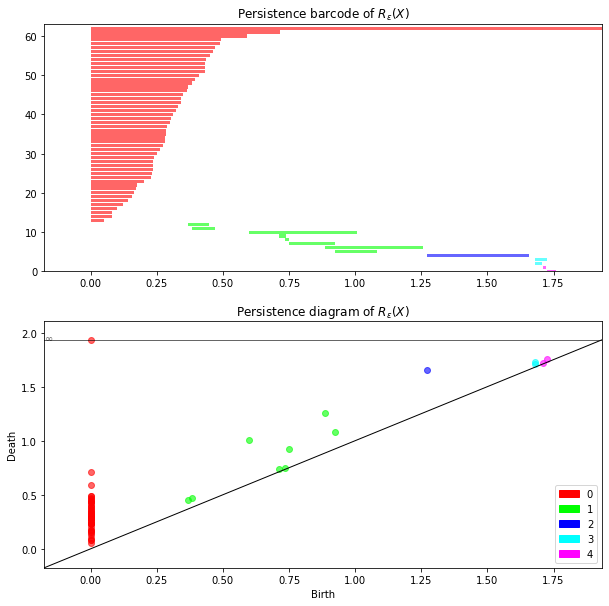

In [11]:
RX = gd.RipsComplex(points=X)
st_X = RX.create_simplex_tree(max_dimension=5)
diag_X = st_X.persistence(min_persistence=0.01)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
gd.plot_persistence_barcode(diag_X, legend=False)
plt.title(r'Persistence barcode of $R_\varepsilon(X)$')
plt.subplot(2,1,2)
gd.plot_persistence_diagram(diag_X, legend=True)
plt.title(r'Persistence diagram of $R_\varepsilon(X)$')
plt.show()

Notice how the bars corresponding to $H_3$ and $H_4$ are alive only for a short period of time. In the persistence diagram, the points corresponding to such bars are very close to the diagonal, indicating that they are not very relevant and are probably just noise. That confirms our hypothesis, but it is good to see it on real-world data problems.

Now we can compute the landscapes, but there are so many of them that it is difficult to see any relevant shape.

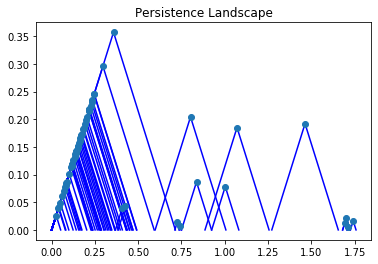

In [12]:
bd_coords = [x[1] for x in diag_X]
fig = landscape(bd_coords)

We will only compute some of the individual landscape functions, otherwise we would not be able to identify anything in a simple plot. 

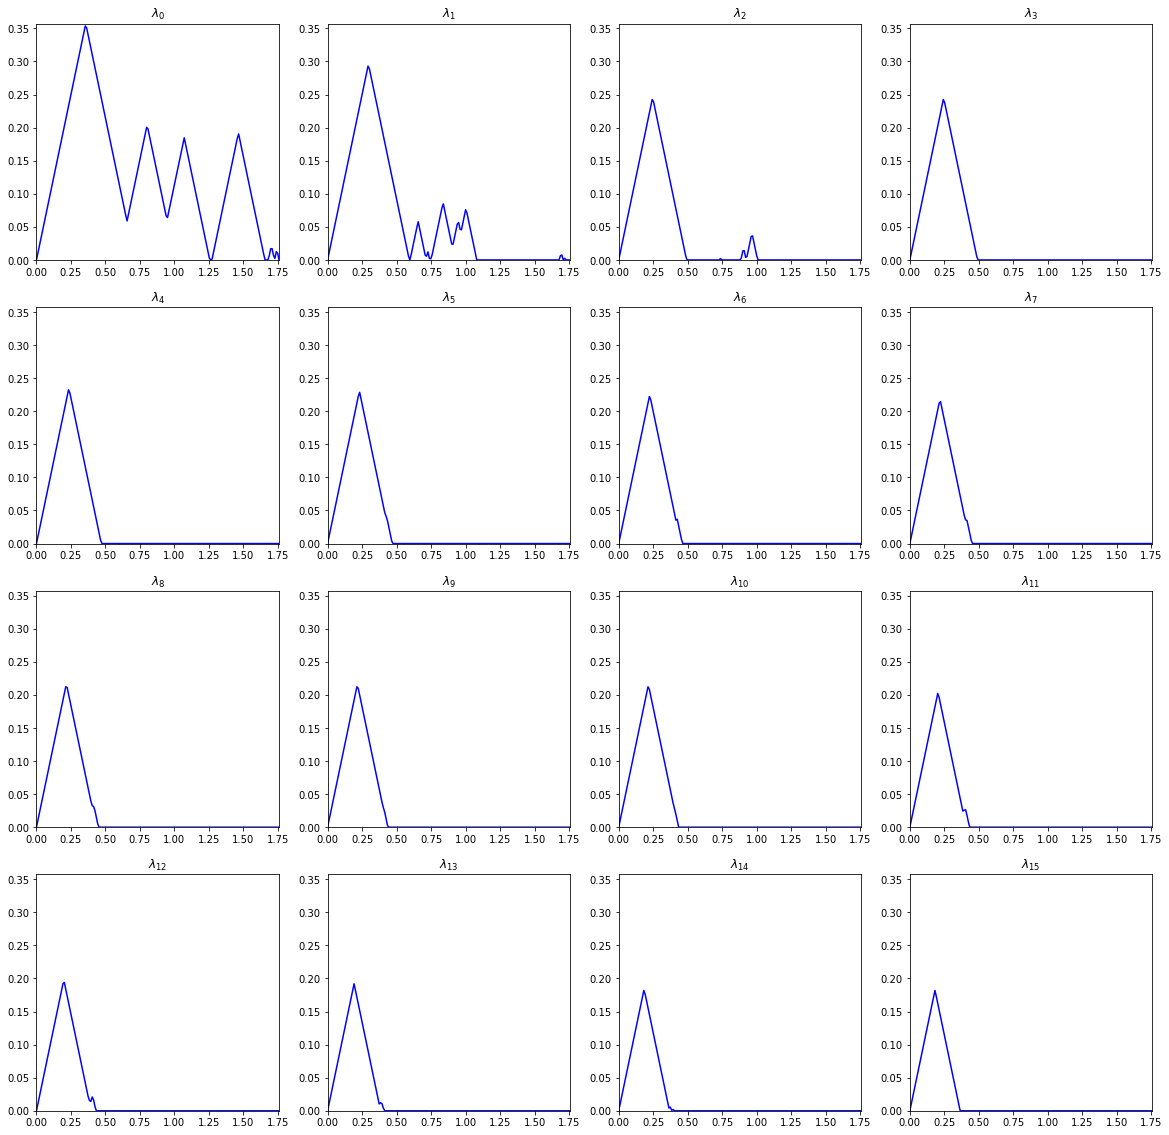

In [13]:
bd_coords = [x[1] for x in diag_X if x[1][1] != float('inf')]
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plot_lambda_k(i, bd_coords, ax)
plt.show()

# Distances and Stability Results with Point Clouds

In [14]:
X = [(0.81, 2.87),(2.15, 1.18),(3.19, 3.62),(4.17, 2.01),(5.32, 4.88),(6.21, 3.13)]
Y = [(0.75, 2.80),(2.33, 1.25),(3.28, 3.66),(4.15, 2.15),(5.24, 4.78),(6.34, 3.12)]

Let us compute the Hausdorff distance $d_H(X,Y)$.

In [15]:
directed_hausdorff(X,Y)[0]

0.19313207915827985

Now, let us compute the bottleneck distance. For that matter, we need to perform the Vietoris-Rips filtration and compute the persistence diagram. 

Deprecated parameter. It has been replaced by max_intervals
Deprecated parameter. It has been replaced by max_intervals
Deprecated parameter. It has been replaced by max_intervals
Deprecated parameter. It has been replaced by max_intervals


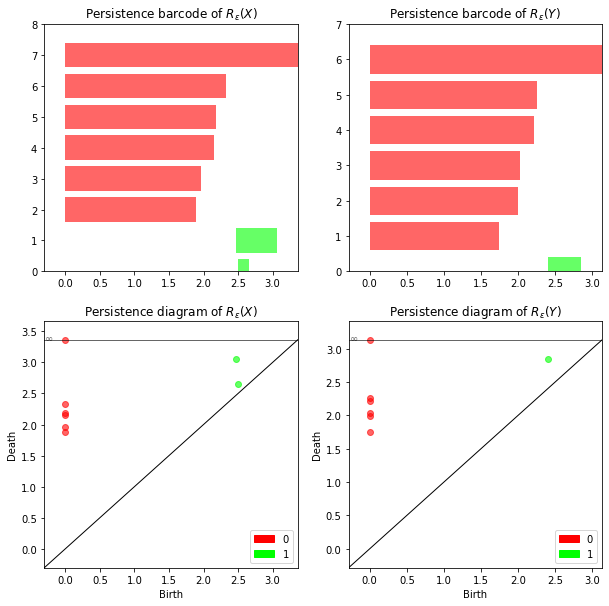

In [16]:
RX = gd.RipsComplex(points=X)
st_X = RX.create_simplex_tree(max_dimension=len(X))
diag_X = st_X.persistence(min_persistence=0.01)

RY = gd.RipsComplex(points=Y)
st_Y = RY.create_simplex_tree(max_dimension=len(Y))
diag_Y = st_Y.persistence(min_persistence=0.01)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
gd.plot_persistence_barcode(diag_X, legend=False)
plt.title(r'Persistence barcode of $R_\varepsilon(X)$')
plt.subplot(2,2,2)
gd.plot_persistence_barcode(diag_Y, legend=False)
plt.title(r'Persistence barcode of $R_\varepsilon(Y)$')
plt.subplot(2,2,3)
gd.plot_persistence_diagram(diag_X, legend=True)
plt.title(r'Persistence diagram of $R_\varepsilon(X)$')
plt.subplot(2,2,4)
gd.plot_persistence_diagram(diag_Y, legend=True)
plt.title(r'Persistence diagram of $R_\varepsilon(Y)$')
plt.show()

Now let us compute the Bottleneck distance between $D(X)$ and $D(Y)$:

In [17]:
persistence_points_X = [x[1] for x in diag_X]
persistence_points_Y = [y[1] for y in diag_Y]
gd.bottleneck_distance(persistence_points_X, persistence_points_Y)

0.21256525302337526

So, $W_\infty(D(X),D(Y))  < 2d_H(X,Y)$.

# Performing TDA on a function. 

In [18]:
def getPersistence(vec, clean=True):
  """
  This transforms the 1D time series vec into a persistence diagram.
  """
  simplex_up = gd.SimplexTree()
  simplex_dw = gd.SimplexTree()
  # Fullfill the simplexes
  for i in np.arange(len(vec)): 
    simplex_up.insert([i], filtration=vec[i])
    simplex_dw.insert([i], filtration=-vec[i])
  for i in np.arange(len(vec)-1): 
    simplex_up.insert([i, i+1], filtration=vec[i])
    simplex_dw.insert([i, i+1], filtration=-vec[i])
  # Initialize the filtrations
  simplex_up.initialize_filtration()
  simplex_dw.initialize_filtration()


  dig_up = simplex_up.persistence()
  dig_dw = simplex_dw.persistence()

  if clean:
    dig_up = np.asarray([[ele[1][0], ele[1][1]] for ele in dig_up if ele[1][1] < np.inf])
    dig_dw = np.asarray([[ele[1][0], ele[1][1]] for ele in dig_dw if ele[1][1] < np.inf])

  return dig_up, dig_dw, simplex_up, simplex_dw

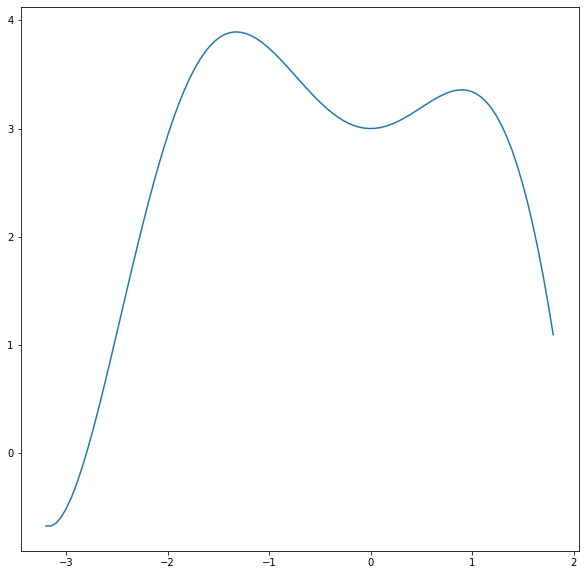

In [19]:
def f(x):
  return np.cos(x)*x*x - 0.2*x*x*x + 3

x = np.linspace(-3.2, 1.8, num=100)
fx = f(x)

plt.figure(figsize=(10, 10))
plt.plot(x, fx)
plt.show()

Deprecated parameter. It has been replaced by max_intervals
Deprecated parameter. It has been replaced by max_intervals


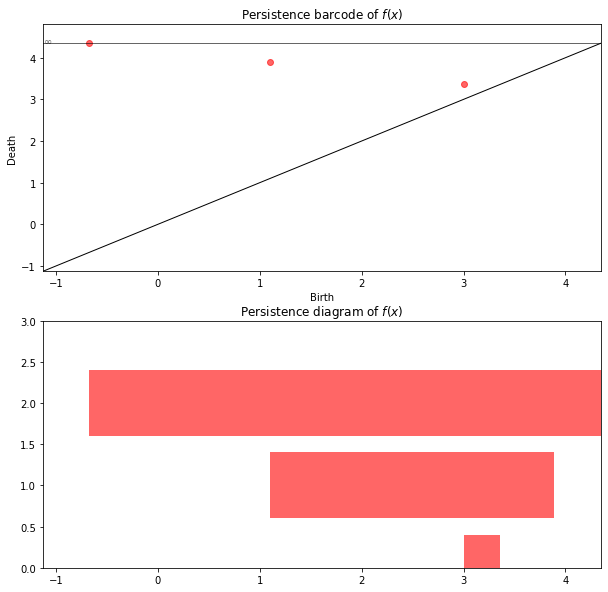

In [20]:
dig_up, dig_dw, simplex_up, simplex_dw = getPersistence(fx, clean=False)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
gd.plot_persistence_diagram(dig_up)
plt.title(r'Persistence barcode of $f(x)$')
plt.subplot(2,1,2)
gd.plot_persistence_barcode(dig_up)
plt.title(r'Persistence diagram of $f(x)$')
plt.show()

# Distances and Stability results on Functions

In [21]:
def bar_distance(b1,d1,b2,d2):
    if d1 == np.inf and d2 == np.inf:
        return np.abs(b1-b2)
    else:
        a=np.max( [(d1-b1)/2., (d2-b2)/2.] )
        b=np.max( [np.abs(b1 - b2), np.abs(d1- d2)] )
        return np.min( [a , b] )

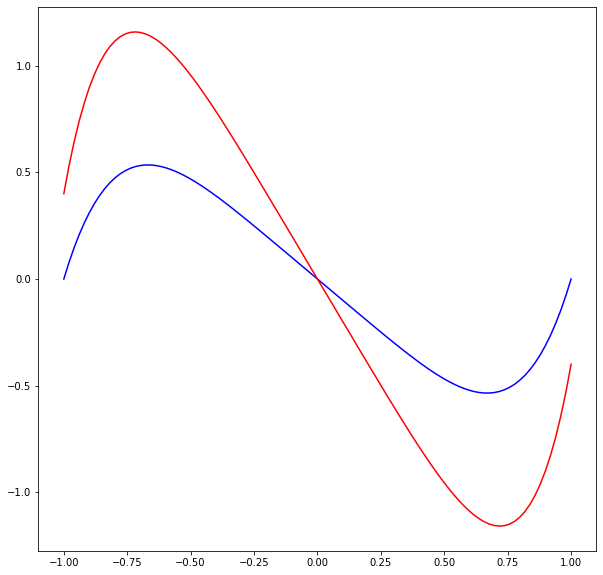

In [22]:
def f(x): 
    return x**5-x
def g(x):
    return 1./5*(x**9+7*x**5-10*x)

x = np.linspace(-1,1,100)
plt.figure(figsize=(10,10))
plt.plot(x,f(x),'b')
plt.plot(x,g(x),'r')
plt.show()

First we compute the persistence diagram and the persistence barcode of both functions.

Deprecated parameter. It has been replaced by max_intervals
Deprecated parameter. It has been replaced by max_intervals
Deprecated parameter. It has been replaced by max_intervals
Deprecated parameter. It has been replaced by max_intervals


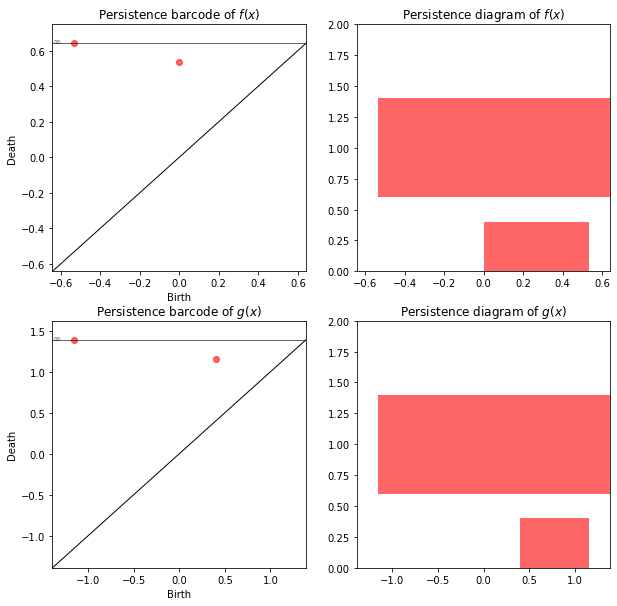

In [23]:
dig_up_f, dig_dw_f, simplex_up_f, simplex_dw_f = getPersistence(f(x), clean=False)
dig_up_g, dig_dw_g, simplex_up_g, simplex_dw_g = getPersistence(g(x), clean=False)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
gd.plot_persistence_diagram(dig_up_f)
plt.title(r'Persistence barcode of $f(x)$')
plt.subplot(2,2,2)
gd.plot_persistence_barcode(dig_up_f)
plt.title(r'Persistence diagram of $f(x)$')
plt.subplot(2,2,3)
gd.plot_persistence_diagram(dig_up_g)
plt.title(r'Persistence barcode of $g(x)$')
plt.subplot(2,2,4)
gd.plot_persistence_barcode(dig_up_g)
plt.title(r'Persistence diagram of $g(x)$')
plt.show()

Compute the bottleneck distance between the two persistence diagrams.

In [24]:
persistence_points_f = [x[1] for x in dig_up_f]
persistence_points_g = [x[1] for x in dig_up_g]
gd.bottleneck_distance(persistence_points_f, persistence_points_g)

0.6238988143117575

Compute the $\ell_\infty$ norm of the two functions.

In [25]:
np.linalg.norm(f(x)-g(x), np.inf)

0.6430946268306426

In general, computing the interleaving distance between two barcodes is an NP-Hard problem. In this case, since each barcode has only two bars, we can compute the matching by hand. We already know that the two infinite rays have to be matched together, so the only two remaining bars will be aswell. In this case, computing the interleaving distance means computing the distance between two rays, which is fairly easy.

In [26]:
np.max([bar_distance(dig_up_f[0][1][0],dig_up_f[0][1][1],dig_up_g[0][1][0],dig_up_g[0][1][1]),
       bar_distance(dig_up_f[1][1][0],dig_up_f[1][1][1],dig_up_g[1][1][0],dig_up_g[1][1][1])])

0.6238988143117575

Notice that $W_\infty(D(f),D(g)) = d_{int}(V(f),V(g)) \leq ||f(x)-g(x)||_\infty$